In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

# Dimensionality

In class we have touched upon various attributes of "the curse of dimensionality." Let's play with a dataset with a higher dimensionality and see what we can learn about its true dimension.  

The dataset in question is the OpenML dataset `solar-flares`. We can load this from the https://OpenML.org data repository for machine learning. This is a dataset that attempts to relate the kinds of properties of the Sun that will predict the expected number of flares in a 24-hour period. You can read more about it at https://www.openml.org/d/40686 . Note in particular that only the first 10 columns are data; columns 11-13 are predictions. 

Let's determine a few things about the dimensionality of this data and whether we can reduce dimensionality while retaining classification accuracy. 

Full disclosure: I am an amateur solar observer with an advanced home solar telescope that allows viewing of solar flares and prominences on any clear day. It is called a "hydrogen Alpha" telescope. 

In [2]:
# Run this first to load all libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
solar = fetch_openml(name='solar-flare', version=3)

In [3]:
solar.data

,largest_spot_size,spot_distribution,Activity,Evolution,Previous_24_hour_flare_activity_code,Historically-complex,Did_region_become_historically_complex,Area,Area_of_the_largest_spot,C-class_flares_production_by_this_region,M-class_flares_production_by_this_region,X-class_flares_production_by_this_region
0,4,2,1,2,1,1,2,1,2,0,0,0
1,4,2,1,3,1,1,2,1,2,0,0,0
2,4,2,1,3,1,1,2,1,1,0,0,0
3,4,2,1,3,1,1,2,1,2,0,0,0
4,0,2,1,3,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
310,3,2,1,2,1,2,2,1,2,0,0,0
311,3,2,1,3,1,1,2,1,2,0,0,0
312,0,2,1,3,1,1,2,1,2,0,0,0
313,3,2,1,3,1,1,2,1,1,0,0,0


In [4]:
solar.target

0      1
1      2
2      1
3      2
4      2
      ..
310    1
311    2
312    3
313    1
314    3
Name: class, Length: 315, dtype: category
Categories (5, object): ['0', '1', '2', '3', '5']

<!-- BEGIN QUESTION -->

*Question 1:* Make the best possible predictor of the target value based upon all 13 columns of the original dataset. What is the accuracy of this predictor? Hint: You are free to use any method we have used so far, or to branch out and use other methods. Create a pipeline and use some form of hyperparameter search to tune your solution optimally.  For full credit, exhibit all the tests you do, in order. These will inform other tests. 

In [5]:
# Train and test your solution here. Store the achieved accuracy in a variable "accuracy".
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import scipy.stats as stats

pipe = Pipeline([['scale', StandardScaler()], ['classify', SVC()]])

#halving grid search CV
param_grid = { 'classify__C': np.arange(1, 100), 'classify__gamma': np.arange(0.001, 0.01, 0.001)}
hgrid = HalvingGridSearchCV(pipe, param_grid)
hgrid.fit(solar.data, solar.target)
print(hgrid.best_params_)
print(hgrid.best_score_)

#randomized search CV
param = { 'classify__C': stats.expon(scale = 10), 'classify__gamma': stats.expon(scale = 0.1)}
rgrid = RandomizedSearchCV(pipe, param, n_iter = 500)
rgrid.fit(solar.data, solar.target)

print(rgrid.best_params_)
print(rgrid.best_score_)

# This will tell me your accuracy
#best accuracy is using randomized search CV
accuracy = rgrid.best_score_
accuracy

{'classify__C': 86, 'classify__gamma': 0.007}
0.6599999999999999
{'classify__C': 16.152617446981345, 'classify__gamma': 0.018514427441825992}
0.7206349206349205


0.7206349206349205

In [6]:
grader.check("q1")

q1 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 2:* Create a pipeline utilizing PCA and your ending classifier and repeat the experiment from question 1. Determine the effects of reducing the dimension of data from 13 to each of 3 to 12. How does accuracy change when reducing dimension? Draw a plot of dimension vs. accuracy. Then -- in the following Markdown box -- tell me what dimension I should be choosing for best score, and why. Show all of your work, including intermediate tests you did.

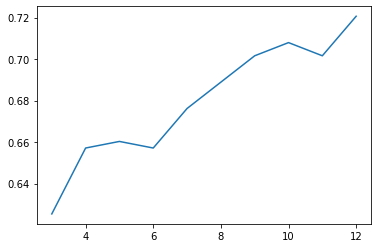

In [7]:
best_scores = list()  # if you fill this with scores for dimensions 3-12, I will plot it for you at the end. 
best_params = list()
from sklearn.decomposition import PCA

for i in range(3,13):
    p = Pipeline([['scale', StandardScaler()], ['pca', PCA(n_components = i)], ['classify', SVC()]])
    param = { 'classify__C': stats.expon(scale = 10), 'classify__gamma': stats.expon(scale = 0.1)}
    g = RandomizedSearchCV(p, param, n_iter = 300)
    g.fit(solar.data, solar.target)
    best_params.append(g.best_params_)
    best_scores.append(g.best_score_)

# if you put your scores into a list best_scores, I will plot them for you.
plt.plot(range(3,13), best_scores)

In [8]:
#Getting Best Score:
score = max(best_scores)

#Getting Best Params for that Score:
index = best_scores.index(score)
params = best_params[index]

#Getting best no. of components/dimensions
d = index + 3

print(d)
print(params)
print(score)

12
{'classify__C': 17.14363612015781, 'classify__gamma': 0.018607512382650022}
0.7206349206349205


Based on the codes above and graph, we can see that when we reduce dimensionality to 12, we will get the best score of when 0.7206349206349206 with parameters C = 17.14363612015781 and gamma = 0.018607512382650022. Focusing on dimensionality, it shows that we can't reduce dimensionality too much while retaining classification accuracy as when dimensionality decreases, the overall trend showed a decrease in accuracy. 

Dimension reduction is done to remove features that are irrelevant from busy/large datasets. Looking back at the labels of the 13 columns, we only have little features to begin with, so reducing dimensionality to 3-12 will definitely have a great effect in classification accuracy. It seems, at least to me, that they are all important columns that are relevant to the classification, which is why it made sense that reducing dimensionality to 12 gives the best accuracy.

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [9]:
grader.check_all()

q1 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

You are not done until you upload the exported zipfile to GradeScope.

In [10]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)